In [1]:
import pandas as pd
import duckdb
import matplotlib.pyplot as plt
conn = duckdb.connect('mydb.db') # create an in-memory database

In [2]:
conn.sql("SHOW ALL TABLES")

┌──────────┬─────────┬─────────────┬───────────────────────────┬──────────────────────────────────────┬───────────┐
│ database │ schema  │    name     │       column_names        │             column_types             │ temporary │
│ varchar  │ varchar │   varchar   │         varchar[]         │              varchar[]               │  boolean  │
├──────────┼─────────┼─────────────┼───────────────────────────┼──────────────────────────────────────┼───────────┤
│ mydb     │ main    │ DEEP1       │ [Tile, ADbc, RPTRbc, TBB] │ [VARCHAR, VARCHAR, VARCHAR, VARCHAR] │ false     │
│ mydb     │ main    │ DEEP1UNIQ   │ [Tile, ADbc, RPTRbc, TBB] │ [VARCHAR, VARCHAR, VARCHAR, VARCHAR] │ false     │
│ mydb     │ main    │ DEEP2       │ [Tile, ADbc, RPTRbc, TBB] │ [VARCHAR, VARCHAR, VARCHAR, VARCHAR] │ false     │
│ mydb     │ main    │ DEEP2UNIQ   │ [Tile, ADbc, RPTRbc, TBB] │ [VARCHAR, VARCHAR, VARCHAR, VARCHAR] │ false     │
│ mydb     │ main    │ TBB_U       │ [TBB]                     │ [VARCHA

In [3]:
conn.sql("SELECT * FROM DEEP2 WHERE RPTRbc = 'CTGTTCAATTAGCT'")

┌─────────┬─────────┬─────────┬─────────┐
│  Tile   │  ADbc   │ RPTRbc  │   TBB   │
│ varchar │ varchar │ varchar │ varchar │
├───────────────────────────────────────┤
│                0 rows                 │
└───────────────────────────────────────┘

In [9]:
# # take use values from unionfil and give Tile/BC/BC values using unionfil
# conn.sql("""CREATE TABLE UFIL_BIG AS
#         SELECT UDEEP.Tile, UDEEP.ADbc, UNIONFIL.RPTRbc, UDEEP.TBB  
#         FROM UNIONFIL
#         LEFT JOIN UDEEP ON (UNIONFIL.RPTRbc = UDEEP.RPTRbc)""")

# conn.sql("""SELECT * FROM UFIL_BIG LIMIT 10""")

┌──────────────────────┬─────────────┬────────────────┬────────────────────────────────────────────────────────────────┐
│         Tile         │    ADbc     │     RPTRbc     │                              TBB                               │
│       varchar        │   varchar   │    varchar     │                            varchar                             │
├──────────────────────┼─────────────┼────────────────┼────────────────────────────────────────────────────────────────┤
│ GATTTGCAAGGTAAATTC…  │ TTTATCCTCGG │ AAAAAATTACTTGG │ GATTTGCAAGGTAAATTCTTGGCTGCTCCATTGGAAGAGAATCCAAATTTGCCACAATCT…  │
│ GACCCATATATGTCTGCT…  │ TGAAATGGTAA │ CAAAAAGCTATGGT │ GACCCATATATGTCTGCTCCAAATTCTACTGCATTTACTGCTTTGACTTCTCCATCTCCA…  │
│ GCTTTGGCTGGTGATCCA…  │ TGGTAATGAGA │ TTTAAATGGCTAAT │ GCTTTGGCTGGTGATCCATGGTATCCATTGTTTCCACAAGATGATCAAGTTGAACAACCT…  │
│ GATTATCATTCTCAAGCT…  │ AAGGTCCGAGG │ AACAAATACAGAGT │ GATTATCATTCTCAAGCTACTGCTGACTTTGTCTTGTATCCACAAGCTTCTCCAGCTCAT…  │
│ GATATTGAAGCTAGATCA…  │ CCCCGCC

In [6]:
conn.sql("""SELECT 
(SELECT COUNT(TBB) FROM UDEEP) AS UDEEP,
(SELECT COUNT(RPTRbc) FROM UNIONFIL) AS UFIL,
(SELECT COUNT (TBB) FROM UFIL_BIG) as UFILBIG
""")

┌──────────┬──────────┬──────────┐
│  UDEEP   │   UFIL   │ UFILBIG  │
│  int64   │  int64   │  int64   │
├──────────┼──────────┼──────────┤
│ 15342081 │ 12089998 │ 12089998 │
└──────────┴──────────┴──────────┘

In [5]:
#unique AD BCs / How many are duplicated ...

#save as df
adbc_stats = conn.sql("""SELECT COUNT(*), ADbc
FROM UFIL_BIG
GROUP BY ADbc
ORDER BY count_star() ASC""").df()

In [6]:
adbc_stats.describe()

,count_star()
count,3.737674e+06
mean,3.234631e+00
std,2.374594e+00
min,1.000000e+00
25%,2.000000e+00
50%,3.000000e+00
75%,4.000000e+00
max,1.760000e+02


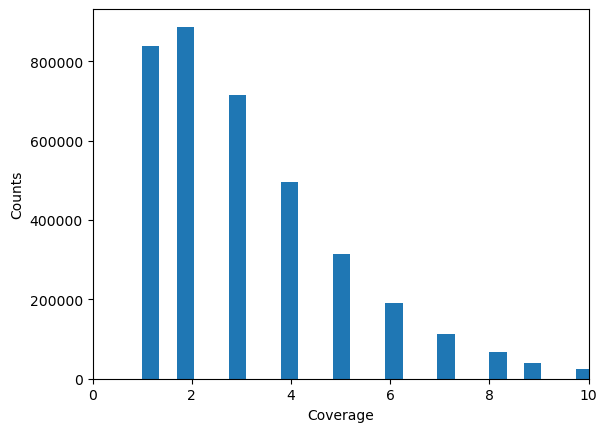

In [7]:
# plot adbc counts on histogram

plt.figure()
plt.hist(adbc_stats['count_star()'],  bins=500)
plt.xlabel('Coverage')
plt.ylabel('Counts')

plt.xlim([0, 10])
plt.show()

In [5]:
#unique TILES / How many are duplicated ...

#save as df
tile_stats = conn.sql("""SELECT COUNT(*), TILE
FROM UFIL_BIG
GROUP BY TILE""").df() #.describe()

In [6]:
tile_stats.head()

,count_star(),Tile
0,708,TCTACTTTGCAAGCTTCTTCTGCTTCTCCAATTCAGAATCCAAGAG...
1,884,TCTCATCAATTGAGACAGAATTTGCAAGGTAGAGTTCATTTGCAAC...
2,547,TCTTGGGCTCCATTGTTTAATGATGATAATAATCAACATGTTGTTG...
3,592,TCTTCTATTCCACAAGGTGAATATAGATTGAGACATTCTAGACATT...
4,545,TCTTCTACTAATATGGGTACTGTTTCTCCACAAGATTTGTTGAGAG...


In [7]:
tile_stats.describe()

,count_star()
count,20630.000000
mean,586.039651
std,172.945566
min,1.000000
25%,471.000000
50%,589.000000
75%,702.000000
max,2485.000000


In [8]:
tile_stats.quantile(q=[0.05, 0.95])

/tmp/ipykernel_4797/962320059.py:1: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  tile_stats.quantile(q=[0.05, 0.95])


,count_star()
0.05,310.0
0.95,863.0


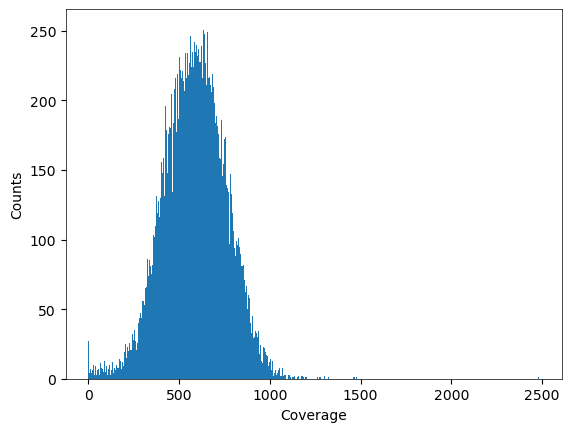

In [13]:
# plot tile counts on histogram

plt.figure()
plt.hist(tile_stats['count_star()'],  bins=500)
plt.xlabel('Coverage')
plt.ylabel('Counts')
# plt.rcParams['axes.linewidth'] = 1.0
# plt.xlim([0, 10])
# plt.savefig('A10tilecoverage.png', dpi= 300, format='png')
plt.show()

In [10]:
pwd

'/global/scratch/users/empchase/A10_sequencing/analysis'

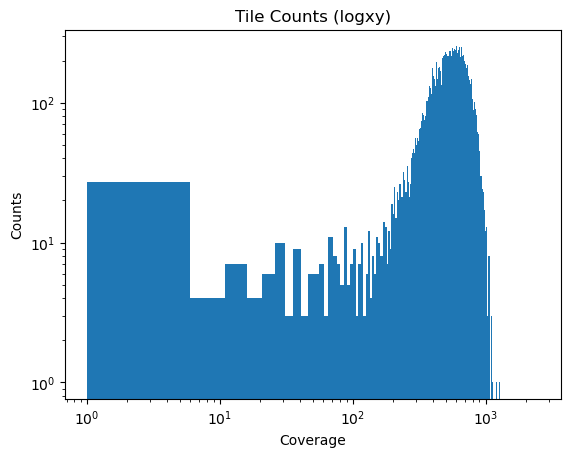

In [19]:
# plot tile counts on histogram in log space

plt.figure()
plt.hist(tile_stats['count_star()'], bins=500)
plt.xlabel('Coverage')
plt.ylabel('Counts')
plt.title('Tile Counts (logxy)')
plt.xscale('log')
plt.yscale('log')


# plt.xlim([0, 10])
plt.show()

In [14]:
tile_stats.head()

,count_star(),Tile
0,728,TCTAATCATGTTGGTACTATTTCTCCACAAGATTTGTTGATTCAAG...
1,493,TCTCAAGATTTGTTTGCTTCTCCAGTTAAACAACAACATCAGAAAG...
2,458,CAACAACAACAACAACAACAACAACAACAACAACAACAACAACAAC...
3,524,GAAAGATCTGGTTCTTCTTCTATTGGTTCTCCAATTGTCTTGGATT...
4,573,AATGGTGATAATTGGTATTCTTTGTTTCCAGAAGTTAATCAAGATT...


In [22]:
tile_stats.iloc[0,1]

'TCTAATCATGTTGGTACTATTTCTCCACAAGATTTGTTGATTCAAGATCCATATATGTCTGCTCCAAATTCTACTGCTTTGACTGCTTTGACTTCTCCATCTTTGTATGAATCTCCAGAT'

In [17]:
tile_stats[tile_stats['count_star()']==1]

,count_star(),Tile
2644,1,TTCTTGCCAACTCCAATGATTGAAGAAGCTAAATTGTCTCAAACTA...
6605,1,CCAAATTCTCAATCTAATGATAATAATAATAATAATTCTGTTAATT...
6606,1,CATCAACAATCTTGGTTGCCATCTCCACCACCACAACAACCATTGG...
6607,1,AAATTGATGATTAATAATAATCATTCTTCTGGTAAGATTACTAAGA...
10558,1,GCTCAGAATCCAAATTCTCAATCTAATGATAATAATAATAATAATT...
11811,1,CAAATTTCTAATATTAAAGAAGATGATTCTAATAATACTATTAATG...
11814,1,CCATTGGCTCAGAATCCAAATTCTCAATCTAATGATAATAATAATA...
13047,1,CCAGACTTCTCATTTCAAATTTCTAATATTAAAGAAGATGATTCTA...
14288,1,AATAATAATAATAATTCTATTAACTTCTCTAATGAAAATTCTAATA...
20572,1,CCACCACCACAACAACCATTGGCTCAGAATCCAAATTCTCAATCTA...


In [36]:
#unique TBBs / How many are duplicated ...
conn.sql("""SELECT COUNT(RPTRbc), TBB
FROM UFIL_BIG
GROUP BY TBB""").df().describe() #result makes sense

,count(RPTRbc)
count,12089998.0
mean,1.0
std,0.0
min,1.0
25%,1.0
50%,1.0
75%,1.0
max,1.0


In [19]:
totdf = conn.sql("""SELECT * FROM UFIL_BIG""").df()
totdf.head()

,Tile,ADbc,RPTRbc,TBB
0,GATTTGCAAGGTAAATTCTTGGCTGCTCCATTGGAAGAGAATCCAA...,TTTATCCTCGG,AAAAAATTACTTGG,GATTTGCAAGGTAAATTCTTGGCTGCTCCATTGGAAGAGAATCCAA...
1,GACCCATATATGTCTGCTCCAAATTCTACTGCATTTACTGCTTTGA...,TGAAATGGTAA,CAAAAAGCTATGGT,GACCCATATATGTCTGCTCCAAATTCTACTGCATTTACTGCTTTGA...
2,GCTTTGGCTGGTGATCCATGGTATCCATTGTTTCCACAAGATGATC...,TGGTAATGAGA,TTTAAATGGCTAAT,GCTTTGGCTGGTGATCCATGGTATCCATTGTTTCCACAAGATGATC...
3,GATTATCATTCTCAAGCTACTGCTGACTTTGTCTTGTATCCACAAG...,AAGGTCCGAGG,AACAAATACAGAGT,GATTATCATTCTCAAGCTACTGCTGACTTTGTCTTGTATCCACAAG...
4,GATATTGAAGCTAGATCATTCTATGTCTTTGGTTCTCCAGTTTCTC...,CCCCGCCGTCG,TCTAGGTTTCACCC,GATATTGAAGCTAGATCATTCTATGTCTTTGGTTCTCCAGTTTCTC...


In [38]:
# maxdict = dict(zip(totdf.RPTRbc, totdf.TBB))

In [39]:
# maxdict['AAAAAATTACTTGG']

'GATTTGCAAGGTAAATTCTTGGCTGCTCCATTGGAAGAGAATCCAAATTTGCCACAATCTGATGCTATGAACTCTTTGGAAGGATTTACTGCATTTGGTGGTGGTGCTTCTGCTTCTACT-TTTATCCTCGG-AAAAAATTACTTGG'

In [23]:
totdf[totdf['Tile'] == 'TCTAATCATGTTGGTACTATTTCTCCACAAGATTTGTTGATTCAAGATCCATATATGTCTGCTCCAAATTCTACTGCTTTGACTGCTTTGACTTCTCCATCTTTGTATGAATCTCCAGAT']

,Tile,ADbc,RPTRbc,TBB
24150,TCTAATCATGTTGGTACTATTTCTCCACAAGATTTGTTGATTCAAG...,CCTCGCGCCCC,GACCCGCCGGGCAG,TCTAATCATGTTGGTACTATTTCTCCACAAGATTTGTTGATTCAAG...
26419,TCTAATCATGTTGGTACTATTTCTCCACAAGATTTGTTGATTCAAG...,AACCCCCGACC,GTTTTAATACCAGC,TCTAATCATGTTGGTACTATTTCTCCACAAGATTTGTTGATTCAAG...
32978,TCTAATCATGTTGGTACTATTTCTCCACAAGATTTGTTGATTCAAG...,CTCTCAGAGCC,ACGCTCTATAGCAG,TCTAATCATGTTGGTACTATTTCTCCACAAGATTTGTTGATTCAAG...
92123,TCTAATCATGTTGGTACTATTTCTCCACAAGATTTGTTGATTCAAG...,CAGGCCAAATT,TAATCAGGACATCT,TCTAATCATGTTGGTACTATTTCTCCACAAGATTTGTTGATTCAAG...
100712,TCTAATCATGTTGGTACTATTTCTCCACAAGATTTGTTGATTCAAG...,GTTGTTTTTAA,AAAAAATGGCGGGA,TCTAATCATGTTGGTACTATTTCTCCACAAGATTTGTTGATTCAAG...
...,...,...,...,...
12045326,TCTAATCATGTTGGTACTATTTCTCCACAAGATTTGTTGATTCAAG...,CTCCTGATACA,CTGTGCGGCCTTCC,TCTAATCATGTTGGTACTATTTCTCCACAAGATTTGTTGATTCAAG...
12065753,TCTAATCATGTTGGTACTATTTCTCCACAAGATTTGTTGATTCAAG...,GCTGCTAGATC,TTCTAGACAGTATT,TCTAATCATGTTGGTACTATTTCTCCACAAGATTTGTTGATTCAAG...
12079862,TCTAATCATGTTGGTACTATTTCTCCACAAGATTTGTTGATTCAAG...,TACTAACTATT,TAACACGACTCCAC,TCTAATCATGTTGGTACTATTTCTCCACAAGATTTGTTGATTCAAG...
12081149,TCTAATCATGTTGGTACTATTTCTCCACAAGATTTGTTGATTCAAG...,GATACGATTTG,ATCTCAGTATACCT,TCTAATCATGTTGGTACTATTTCTCCACAAGATTTGTTGATTCAAG...


In [3]:
# conn.sql("""COPY UFIL_BIG TO 'A10TBB_FIL_UNION.parquet' (FORMAT PARQUET);""")